# Connor Tou | Lab 6

**What will you use for the database? Input reads?**
* The bowtie2 database containing the human genome is used. For the input reads, the illumina reads are used. 

**If you use the --un unaligned.fastq option, what will unaligned.fastq	contain?**
* The unaligned.fastq file will contain all the reads that did not align to the human genome - the uncontaminated reads we want!

This command was run in the terminal for the mixed_reads1 file in included in /data/Lab6_data:
```
[5367152@ip-172-30-0-105 ~]$ bowtie2 -p 4 --very-fast --no-unal -x /data/references/hg19/hg19 -U /data/Lab6_data/mixed_reads1.fastq -S aligned1.sam --un unaligned1.fastq
```
The output is:
```
1285441 reads; of these:
  1285441 (100.00%) were unpaired; of these:
    1030006 (80.13%) aligned 0 times
    234344 (18.23%) aligned exactly 1 time
    21091 (1.64%) aligned >1 times
19.87% overall alignment rate
```

For the mixed_reads2 file included in /data/Lab6_data, this was the output:
```
1285441 reads; of these:
  1285441 (100.00%) were unpaired; of these:
    1030191 (80.14%) aligned 0 times
    234139 (18.21%) aligned exactly 1 time
    21111 (1.64%) aligned >1 times
19.86% overall alignment rate
```

**What percentage of your sequencing library came	from contaminating human DNA?**
* Based on the analysis for mixed_reads1 (which will be used for the rest of the lab), 19.87% of the library came from human DNA - a lot of contamination!

### For the rest of the lab, the generated unaligned1.fastq file from using the mixed_reads1 file as input in the above analysis will be used. 

## Align the reads	to the	_S. oneidensis_ reference genome

**Now we will align the filtered reads to the database containing the shewanella genome.** <br>
Here is the command used in the terminal:
```
[5367152@ip-172-30-0-105 ~]$ bowtie2 -p 4 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -U unaligned1.fastq -S shewanella_aligned1.sam --un shewanella_unaligned1.fastq
```

The output is:
```
1030006 reads; of these:
  1030006 (100.00%) were unpaired; of these:
    268017 (26.02%) aligned 0 times
    710825 (69.01%) aligned exactly 1 time
    51164 (4.97%) aligned >1 times
73.98% overall alignment rate
```

**If you use the --un unaligned.fastq option, what will unaligned.fastq	contain?**
* This file will contain reads from the filtered read file (those that are not from human contamination) that do not align with the shewanella genome. Thus these reads could be those of further contamination from additional sources. 


#### Now we will run a "very sensitive analysis.
The following terminal command was used:
```
[5367152@ip-172-30-0-105 ~]$ bowtie2 -p 4 --very-sensitive --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -U unaligned1.fastq -S shewanella_vsensitive.sam --un shewanella_vsensitive_unaligned.fastq
```

The output was:
```
1030006 reads; of these:
  1030006 (100.00%) were unpaired; of these:
    266514 (25.87%) aligned 0 times
    711311 (69.06%) aligned exactly 1 time
    52181 (5.07%) aligned >1 times
74.13% overall alignment rate
```

**What percentage of your filtered library didn’t align to the reference genome? If	you	use --verysensitive	instead	of --very-fast,	does this percentage increase or decrease?**
* For the fast bowtie analysis, 26.02% of the filtered sequence did not align to the _S. oneidensis_ reference genome. Using _--very-sensitive_ decreases this percentage to 25.87%. 

## Generate a Coverage Plot

The following was run in the terminal to convert the file with reads that aligned to the shewanella genome to a bam file, sort it, index it, and to generate a file with coverage depth for each position:
```
[5367152@ip-172-30-0-105 ~]$ samtools view -b shewanella_vsensitive.sam > shewanella_vsensitive.bam
[5367152@ip-172-30-0-105 ~]$ samtools sort shewanella_vsensitive.bam > shewanella_vsensitive.sorted.bam
[5367152@ip-172-30-0-105 ~]$ samtools index shewanella_vsensitive.sorted.bam
[5367152@ip-172-30-0-105 ~]$ samtools depth -a shewanella_vsensitive.sorted.bam > shewanella_pileup.tab
```

In [1]:
import csv
import matplotlib.pyplot as plt
from statistics import mean
from collections import Counter
from collections import OrderedDict
from operator import itemgetter
import numpy as np
import matplotlib.ticker as mtick
%matplotlib inline

def makeCoveragePlots(file):
    """Two coverage plots are generated. A .tab file is used as input.
    The first plot is the depth of coverage per position. The second 
    is the distribution of coverage."""
    
    depth = []
    reader = csv.reader(file, delimiter="\t")
    for r in reader:
        depth.append(int(r[2]))
    
    # Plot as function of position
    pos = [i+1 for i in range(len(depth))]
    plt.plot(pos, depth, "r")
    plt.xlabel("Position in Genome")
    plt.ylabel("Depth of Coverage")
    plt.show()
    
    # Print statistics
    print("Maximum coverage = ", max(depth))
    print("Minimum coverage = ", min(depth))
    print("Average coverage = %.3f" % mean(depth))
    
    # Plot Coverage Depth Distribution
    plt.hist(depth,100)
    plt.xlabel("Depth of coverage")
    plt.ylabel("Count")
    plt.show()
    
    #return nothing as plots are displayed
    return

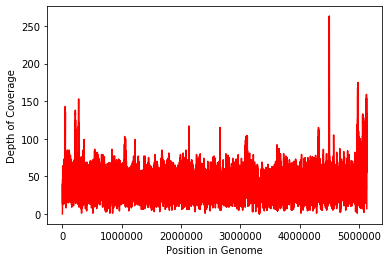

Maximum coverage =  263
Minimum coverage =  0
Average coverage = 37.499


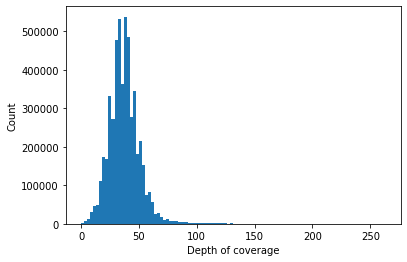

In [8]:
with open("shewanella_pileup.tab") as f:
    makeCoveragePlots(f)

**What is the min, max, and mean coverage across all positions?**
* According to the above calculated statistics: Max = 263, Min = 0, Average = 37.499

## Extra Credit 1 (done with both files from mixed_reads1 and mixed_reads2 that aligned to the human genome)

#### Our first task is to recreate the first two plots with the human aligned file

Making a pileup .tab file - the same as above. The big difference here is that the _-a_ option is not used in order to avoid zero depth positions (which crashes the terminal or creates a massive file of >50Gb)

```
[5367152@ip-172-30-0-105 ~]$ samtools view -b aligned1.sam > aligned1_human.bam
[5367152@ip-172-30-0-105 ~]$ samtools sort aligned1_human.bam > aligned1_human.sorted.bam
[5367152@ip-172-30-0-105 ~]$ samtools index aligned1_human.sorted.bam
[5367152@ip-172-30-0-105 ~]$ samtools depth aligned1_human.sorted.bam > aligned1_human_pileup.tab
```
**These terminal commands were repeated for aligned2.sam which is the file containing the reads that aligned to the human genome from mixed_reads2**

**Note that the average coverage below is not applicable as zero coverage positions are ignored. Also, the position on the first graph is not representative as the .tab file doesn't have the zero coverage positions.**

### Analysis for human-aligned filtered mixed_reads1 File

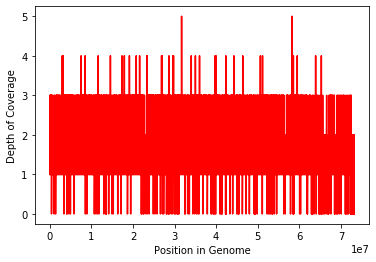

Maximum coverage =  5
Minimum coverage =  0
Average coverage = 1.047


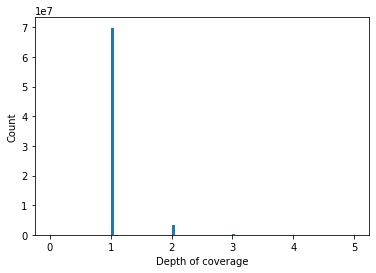

In [9]:
with open("aligned1_human_pileup.tab") as f:
    makeCoveragePlots(f)

### Analysis for human-aligned filtered mixed_reads2 File

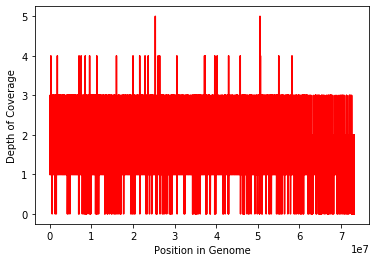

Maximum coverage =  5
Minimum coverage =  0
Average coverage = 1.047


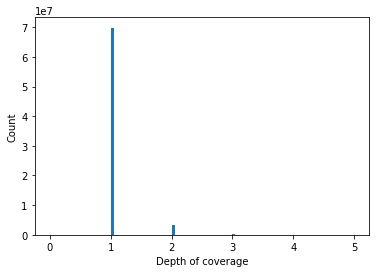

In [2]:
with open("aligned2_human_pileup.tab") as f:
    makeCoveragePlots(f)

### Now we will plot the average depth of coverage for human chromosomes (22, X, Y)

The following was used to extract reads for Chromosome 22, X, and Y from the aligned1_human.sorted bam file

**NOTE: This can be repeated for Chromosomes 1-21 and plotted. Below is shown just for Chromosome 22, X, and Y.**

```
[5367152@ip-172-30-0-105 ~]$ samtools view -b aligned1_human.sorted.bam chr22 > human.sorted.chr22.bam
[5367152@ip-172-30-0-105 ~]$ samtools view -b aligned1_human.sorted.bam chrX > human.sorted.chrX.bam
[5367152@ip-172-30-0-105 ~]$ samtools view -b aligned1_human.sorted.bam chrY > human_vfast.sorted.chrY.bam
```

```
[5367152@ip-172-30-0-105 ~]$ samtools depth -a human.sorted.chr22.bam > human_chr22_pileup.tab
[5367152@ip-172-30-0-105 ~]$ samtools depth -a human.sorted.chrX.bam > human_chrX_pileup.tab
[5367152@ip-172-30-0-105 ~]$ samtools depth -a human_vfast.sorted.chrY.bam > human_chrY_pileup.tab
```

**These commands were repeated for aligned2_human.sorted.bam which is the bam file containing the reads that aligned to the human genome from mixed_reads2**

In [4]:
def calcAvgDepth(file):
    # total_p is the total number of positions in the file, total_d is the cumulated depth
    total_pos = 0
    total_depth = 0
    reader = csv.reader(file, delimiter="\t")
    for row in reader:
        total_pos += 1
        total_depth += int(row[2])
    return total_depth/total_pos



### Analysis for human-aligned filtered mixed_reads1 File

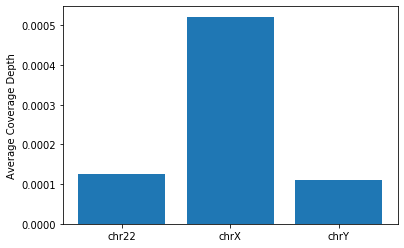

In [5]:
# chromosomes contains the chromosomes of interest
chromosomes = ['chr22', 'chrX', 'chrY']

# chr_avg will contain the average for each chromosome
chr_avg = []
with open("human_chr22_pileup.tab") as f:
    average = calcAvgDepth(f)
    chr_avg.append(average)
    
with open("human_chrX_pileup.tab") as f:
    average = calcAvgDepth(f)
    chr_avg.append(average)
    
with open("human_chrY_pileup.tab") as f:
    average = calcAvgDepth(f)
    chr_avg.append(average)
    
# Generate bar plot
lab = np.arange(len(chromosomes))
plt.bar(lab, chr_avg)
plt.xticks(lab, chromosomes)
plt.ylabel("Average Coverage Depth")
plt.show()

### Analysis for human-aligned filtered mixed_reads2 File

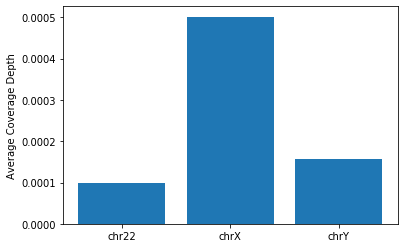

In [5]:
# chromosomes contains the chromosomes of interest
chromosomes = ['chr22', 'chrX', 'chrY']

# chr_avg will contain the average for each chromosome
chr_avg = []
with open("human2_chr22_pileup.tab") as f:
    average = calcAvgDepth(f)
    chr_avg.append(average)
    
with open("human2_chrX_pileup.tab") as f:
    average = calcAvgDepth(f)
    chr_avg.append(average)
    
with open("human2_chrY_pileup.tab") as f:
    average = calcAvgDepth(f)
    chr_avg.append(average)
    
# Generate bar plot
lab = np.arange(len(chromosomes))
plt.bar(lab, chr_avg)
plt.xticks(lab, chromosomes)
plt.ylabel("Average Coverage Depth")
plt.show()

### Coverage Plots for human-aligned filtered mixed_reads1 File

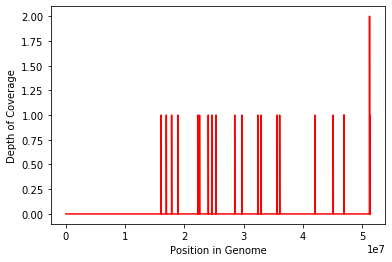

Maximum coverage =  2
Minimum coverage =  0
Average coverage = 0.000


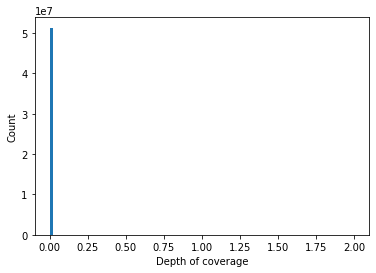

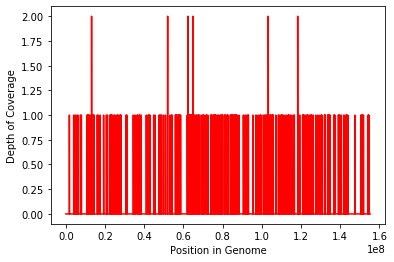

Maximum coverage =  2
Minimum coverage =  0
Average coverage = 0.001


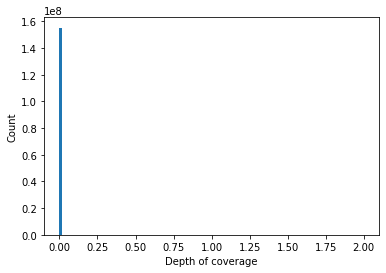

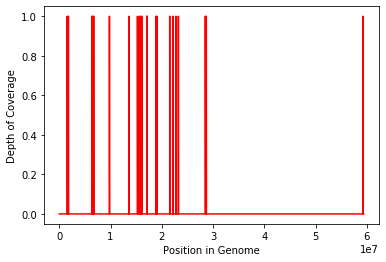

Maximum coverage =  1
Minimum coverage =  0
Average coverage = 0.000


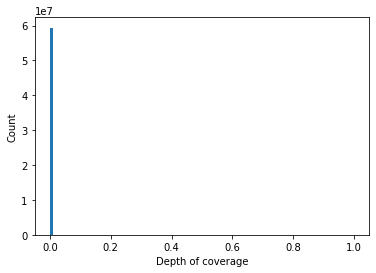

In [3]:
with open("human_chr22_pileup.tab") as f:
    makeCoveragePlots(f)
    
with open("human_chrX_pileup.tab") as f:
    makeCoveragePlots(f)
    
with open("human_chrY_pileup.tab") as f:
    makeCoveragePlots(f)

### Coverage Plots for human-aligned filtered mixed_reads2 File

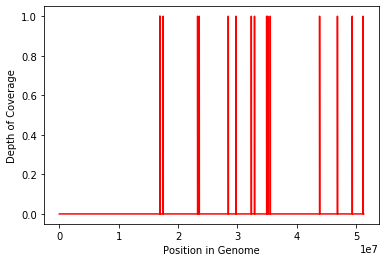

Maximum coverage =  1
Minimum coverage =  0
Average coverage = 0.000


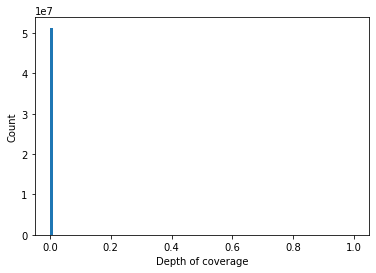

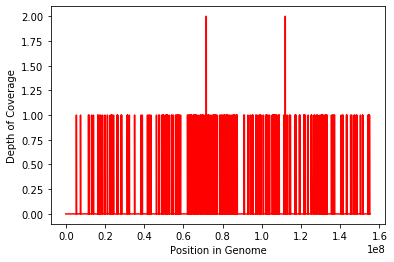

Maximum coverage =  2
Minimum coverage =  0
Average coverage = 0.001


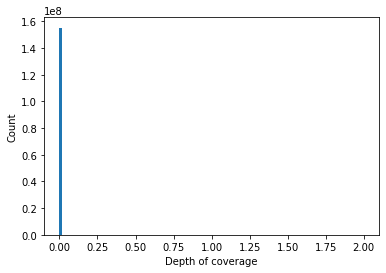

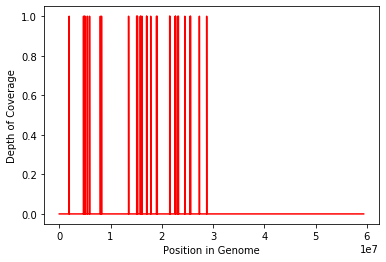

Maximum coverage =  1
Minimum coverage =  0
Average coverage = 0.000


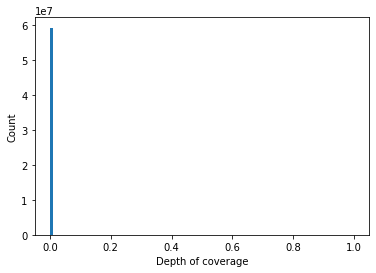

In [6]:
with open("human2_chr22_pileup.tab") as f:
    makeCoveragePlots(f)
    
with open("human2_chrX_pileup.tab") as f:
    makeCoveragePlots(f)
    
with open("human2_chrY_pileup.tab") as f:
    makeCoveragePlots(f)

**The graphs above are in pairs for the files regarding: Chromosome 22, Chromosome X, Chromosome Y in that order**

**What biological sex is Jamie?**
* Female. All of the coverage depths are very low (<0.1%). Chromosome Y does not have the maximum coverage. Chromosome X does (coverage = 2). It seems that some of the human DNA found in the provided sequence reads does not have a chromosome Y - instead these matches occured just by chance. This is confirmed in the below extra credit where the higher coverage regions of chromosome Y show alignments to other chromosomes. 

##  Extra Credit 2:

In [9]:
def findHighCoverage(file):
    min_length = 20
    
    indices = []
    reader = csv.reader(file, delimiter="\t")
    
    i = 1
    imem = 1

    for row in reader:
        i+=1
        # if the position does not have a coverage of 1
        if not(int(row[2])==1):
            # check if continuous sequence of coverage 1 is larger that min_length
            if (i-imem)>min_length:
                indices.append((imem,i))
            imem = i

    return indices

**We will find high coverage areas in Chromosome Y. Sequences will be extracted and blasted and we will see if these align to a gene in Chromosome Y, which would point out that Jamie is male. However, if this alignment is not the case, the coverage from Y is likely just a match by chance**

In [10]:
# Using the file corresponding to the original file of mixed_reads1 for the sake of this exercise (NOT mixed_reads2)
with open("human_chrY_pileup.tab") as f:
    region = findHighCoverage(f)
    print("High coverage regions in chrY: ", region)

High coverage regions in chrY:  [(1551659, 1551941), (1773378, 1773426), (1773426, 1773680), (6392890, 6393191), (6497010, 6497311), (6709092, 6709320), (6709321, 6709395), (9782151, 9782452), (13582272, 13582573), (15246753, 15247054), (15637489, 15637790), (15854242, 15854543), (16081496, 16081797), (17059084, 17059385), (17083728, 17083798), (17083799, 17083867), (17083874, 17084034), (18874488, 18874641), (18874641, 18874790), (19029658, 19029959), (21538699, 21539000), (22195900, 22196201), (22757032, 22757333), (23226950, 23227251), (28489324, 28489625), (28675636, 28675917), (59265678, 59265977)]


**For this exercise, I am picking 3 high coverage regions. The followin was run in the terminal**

```
[5367152@ip-172-30-0-105 ~]$ samtools view aligned1_human.sorted.bam "chrY:1551659-1551941"
contaminated_read886192 0       chrY    1551639 2       19M1D281M       *      00       TGGAATACTATGCAGCCATAAAAAGGATGATTTCATGTCCTTTGCAGGGACATGGATGAAGCTGGAAACCCTCATTCTCAGCAAACTATCGCAAGGACAAAAAACCAAACACCGCATGTTCTCACTCATAGGTGGGAATTGAACAATGAGAACACATGGACACAGGAAGGGGAACATCACACACTGGGGCCTGTTTTGTGGTGGGGGGAGTGGGGAGGGATAGCATTAGGAGATATACCTAATGTTAAATGATGAGTTAATGGGTGCAGCACACCAACATGGCACATGTATACATATGTA    -A@CCEF<A<FFFFC@<,+@6BCCDF?C;EFC<E<@,,C6C:,@@FFA@D,;EFGCFGAF6CFFC<@CF8FF7CFD7FGGCFEGGGFCFGDFEGGGGFG,B?9FGGD7+8444>B+@<?EF8A4EF,C,9,48+4+@+6E,3,>DEFGGG9,188>8,3,6=2:8DE+,7@7C,=*33C:C,2=+3=7:=+=2>=+5282+44==*504=+2?*2)1*1*/184)*007)1).)5/(.((63(,6(3:36(4)))).,.),,301:0310))6)-)-((..3.3((((-,((((((((.(    AS:i:-73        XS:i:-75XN:i:0  XM:i:16 XO:i:1  XG:i:1  NM:i:17 MD:Z:19^C5T5G13T18C6A41T31C25A13C4A5G2G10C0G33C7C47     YT:Z:UU
```

**Blasting the sequence, this is the result with the highest % identity: Homo sapiens 3 BAC RP11-359D24 (Roswell Park Cancer Institute Human BAC Library) complete sequence. This is on Chromosome 3**

```
[5367152@ip-172-30-0-105 ~]$ samtools view aligned1_human.sorted.bam "chrY:19029658-19029959"
contaminated_read372718 16      chrY    19029658        0       300M    *      00       ACTTGGAACCAACCCAAATATCCAACAACGATAGAGTGGATTAAGAAAATGTGGCACATATACACCATGGAATACTATACAGCCATAAAAAATGATGAGTTCATGTCCTTTGTAGGGACATGCGTGAAATTGGAAATCATCATTCTCAGTAAACTATCGCAAGGACAAAAAACCAAACACCACATGTCCTCACTCATAGATGGGTATTGAACAATGAGAACTCATGGACACAGGAAGGGGAACATCACACTCTGGGGACTGTTGTTGGGTGGGGAGAGGGGAGAAGGATAGCATTAGGAG    2*C@E9C@<;*2*;2*4+***=4*4FC2,24,@FC5+++?55+6,,26,,227F@@?,C7,;BGF?,;;CC?,;?;F>@,>5C@77,@77,,,,5,,@73;88,88+<83+838@8,,,C>@8FFEGGDCC7397C7,8D:A88@+EFCEEDE;EDGFECF?FE8A,?9FAFE,<CB+CE4,A+C:==CFFBF?4,9<9EGFC@,EA<<GGCFA<,DF7GCE9DGFFF@,FF@9AB,,@@F9FFFFFFFFDFGGFAFGDGFAGFGFGGGGFGEEFEEDC,CGEFEGGGGGGGEGGCBCCC    AS:i:-98        XS:i:-117       XN:i:0  XM:i:23 XO:i:0  XG:i:0  NM:i:23 MD:Z:5C11T1G8T6T42G13C29G0A39A17G3A1T30G0T1A20T22G8G2A3G2G10G4  YT:Z:UU
```


**Blasting the sequence, this is the result with the highest % identity: Human DNA sequence from clone RP11-159M11 on chromosome 1, complete sequence**


```
[5367152@ip-172-30-0-105 ~]$ samtools view aligned1_human.sorted.bam "chrY: 22757032-22757333"
contaminated_read224242 16      chrY    22757032        6       300M    *      00       GAGAAATAGGAACACTTTTACACTGTTGGTGGGACGGTAAACTAGTTCAACCATTGTGGAAGTCAGTGTGGCGATTCCTCAGGGATCTAGAACTAGTAATACCATTTGACCCAGCCATCCCATTAGTGGGTATATACCCAAAGGACTATAAATCATGCTGCTATAAAGACACATGCACACATATGTTTATTGCGGCATTATTCACAATAGCAAAGACTTGGAACCAACCCAAATGTCCAACAATGATAGACTCGATTAAGAAAATGTGGCACATATACACCATGGAATACTATGCAGCCA    00D6*25<3++)-((-)))4:4:)<6.))-6)-5.).,)(()2:1(6-)/<:4<4-))<:96;BB99:65<>@A2);;*6:4CFD=>;CF9=8AB+8?8?94=@CAC=5:C;7;=7CC;9FCGF@CGFD>DC?EFCCDGGFGGEFGGGGGGGGGGGGFGGFFGGGGGGGGGGGGGGFGGGGGGGGGGGGGGGGGGGGGDGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGGGGFFD<DGGGFGGGGGGGGGGGGGGGGGGGGGGGFGGGGGGGGGGGGGGGGGGGCCCCC    AS:i:-36        XS:i:-39XN:i:0  XM:i:8  XO:i:0  XG:i:0  NM:i:8  MD:Z:35T36A10A12A28C28G25G46G72 YT:Z:UU
```

**Blasting the sequence, this is the result with the highest % identity: Homo sapiens chromosome 1 clone RP11-435I3, complete sequence**


## END OF LAB 6